#### NAME: ANBUSELVAN MAHALINGAM
#### SUBJECT: DSC 640 DATA PRESENTATION AND VISUALIZATION - WEEK 9 & 10

In [109]:
import warnings
# To suppress warnings
warnings.filterwarnings('ignore')

In [110]:
# To load the dataset
import plotly.express as px
import pandas as pd

try:
    crime_data_df = pd.read_csv("crimeratesbystate-formatted.csv")
except:
    print(r"Unable to read file,Please validate the file and try again.!")

In [111]:
crime_data_df.head(n=3)

,state,murder,forcible_rape,robbery,aggravated_assault,burglary,larceny_theft,motor_vehicle_theft
0,United States,5.6,31.7,140.7,291.1,726.7,2286.3,416.7
1,Alabama,8.2,34.3,141.4,247.8,953.8,2650.0,288.3
2,Alaska,4.8,81.1,80.9,465.1,622.5,2599.1,391.0


In [112]:
# To filter only the USA 
us_crime_data_df = crime_data_df[crime_data_df['state'].str.strip().str.lower() == 'united states']

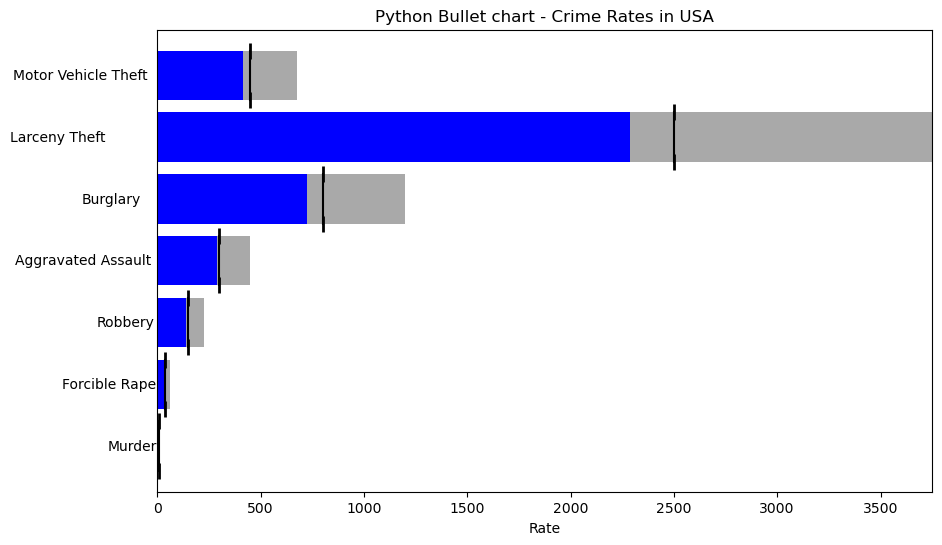

In [113]:
# To Create Bullet chart

import matplotlib.pyplot as plt

# User defined function to create bullet chart
def create_bullet_chart(data, labels, targets, title):
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # To define qualitative ranges (as an example)
    for i, (value, target, label) in enumerate(zip(data, targets, labels)):
        # Define the ranges based on target values
        poor = [0, 0.5 * target]
        satisfactory = [0.5 * target, 0.75 * target]
        good = [0.75 * target, 1.5 * target]
        
        # To plot qualitative ranges
        ax.broken_barh([(poor[0], poor[1] - poor[0])], (i - 0.4, 0.8), facecolors='lightgrey')
        ax.broken_barh([(satisfactory[0], satisfactory[1] - satisfactory[0])], (i - 0.4, 0.8), facecolors='grey')
        ax.broken_barh([(good[0], good[1] - good[0])], (i - 0.4, 0.8), facecolors='darkgrey')
        
        # To plot target marker
        ax.plot([target, target], [i - 0.4, i + 0.4], 'k', marker='|', markersize=12, markeredgewidth=2)
        
        # To plot value
        ax.broken_barh([(0, value)], (i - 0.4, 0.8), facecolors='blue')
        
        # To add label
        ax.text(-0.1 * target, i, label, ha='right', va='center')
    
    # To set axis parameters
    ax.set_yticks([])
    ax.set_xlim(0, 1.5 * max(targets))
    ax.set_xlabel('Rate')
    ax.set_title(title)

    # To save the figure as a PNG file
    plt.savefig('python-bulletchart.png')
    
    plt.show()

# Crime rates category
labels = ['Murder', 'Forcible Rape', 'Robbery', 'Aggravated Assault', 'Burglary', 'Larceny Theft', 'Motor Vehicle Theft']
data = [5.6, 31.7, 140.7, 291.1, 726.7, 2286.3, 416.7]
targets = [10, 40, 150, 300, 800, 2500, 450] 

# To add title
create_bullet_chart(data, labels, targets, 'Python Bullet chart - Crime Rates in USA')


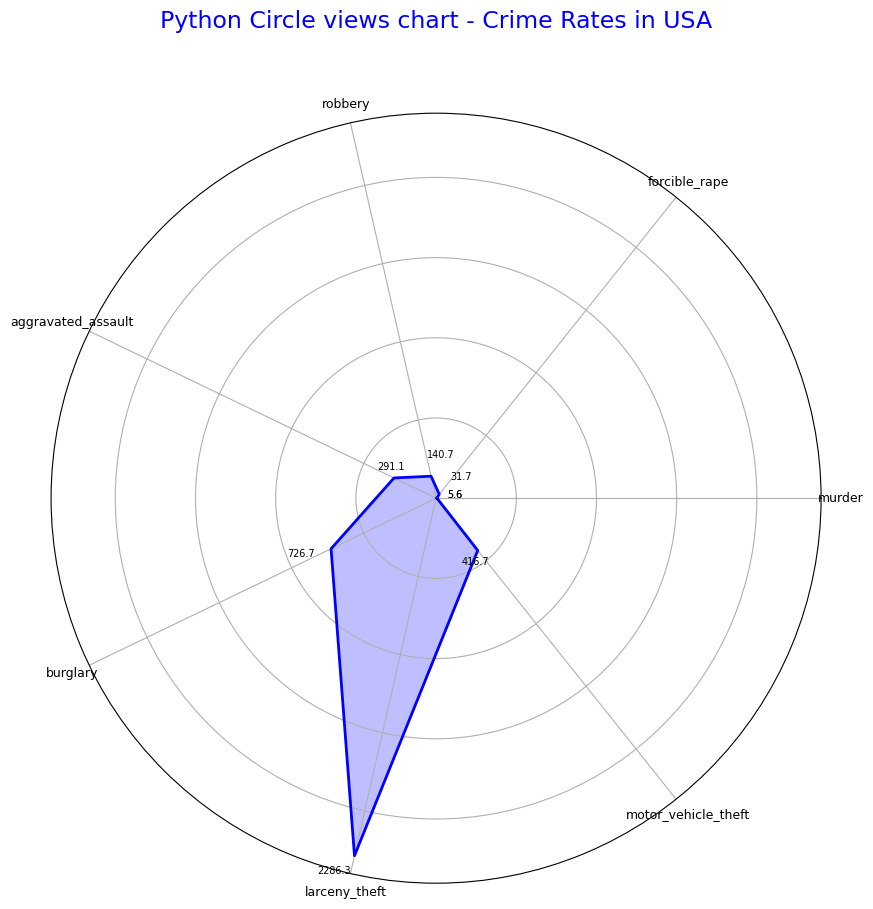

In [114]:
# To create Circle views chart (Radial Bar Chart) - USA alone

import matplotlib.pyplot as plt
import numpy as np

# To extract values for each crime type
categories = ['murder', 'forcible_rape', 'robbery',
              'aggravated_assault', 'burglary',
              'larceny_theft', 'motor_vehicle_theft']
values = us_crime_data_df[categories].values.flatten()

# To check that values array is not empty
if len(values) == 0:
    raise ValueError("The values array is empty. Check the filtering of data.")

# To create the figure and polar subplot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

# Number of variables
num_vars = len(categories)

# To compute angle for each category
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# To repeat the first value to close the circle
values = values.tolist()
values += values[:1]
angles += angles[:1]

# To draw bars
ax.fill(angles, values, color='blue', alpha=0.25)
ax.plot(angles, values, color='blue', linewidth=2)

# To add labels for each point
for angle, value, category in zip(angles, values, categories + [categories[0]]):
    if angle in [0, np.pi]:
        ha = 'center'
    elif 0 < angle < np.pi:
        ha = 'left'
    else:
        ha = 'right'
    ax.text(angle, value + 0.05 * max(values), str(round(value, 1)),
            horizontalalignment=ha, size=7, color='black')

# To draw one axe per variable & labels
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=9)

# To add title
plt.title('Python Circle views chart - Crime Rates in USA', 
          size=17, color='blue', y=1.1)

# To save the figure as a PNG file
plt.savefig('python-circleviewchart.png')

# To display the plot
plt.show()



In [115]:
# To load the dataset
import plotly.express as px
import pandas as pd

try:
    birthrate_data_df = pd.read_csv("birth-rate.csv")
except:
    print(r"Unable to read file,Please validate the file and try again.!")

In [116]:
birthrate_data_df.head(n=3)

,Country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
0,Aruba,36.400,35.179,33.863,32.459,30.994,29.513,28.069,26.721,25.518,...,15.024,14.528,14.041,13.579,13.153,12.772,12.441,12.159,11.919,11.716
1,Afghanistan,52.201,52.206,52.208,52.204,52.192,52.168,52.130,52.076,52.006,...,51.229,50.903,50.486,49.984,49.416,48.803,48.177,47.575,47.023,46.538
2,Angola,54.432,54.394,54.317,54.199,54.040,53.836,53.585,53.296,52.984,...,48.662,48.355,48.005,47.545,46.936,46.184,45.330,44.444,43.607,42.875


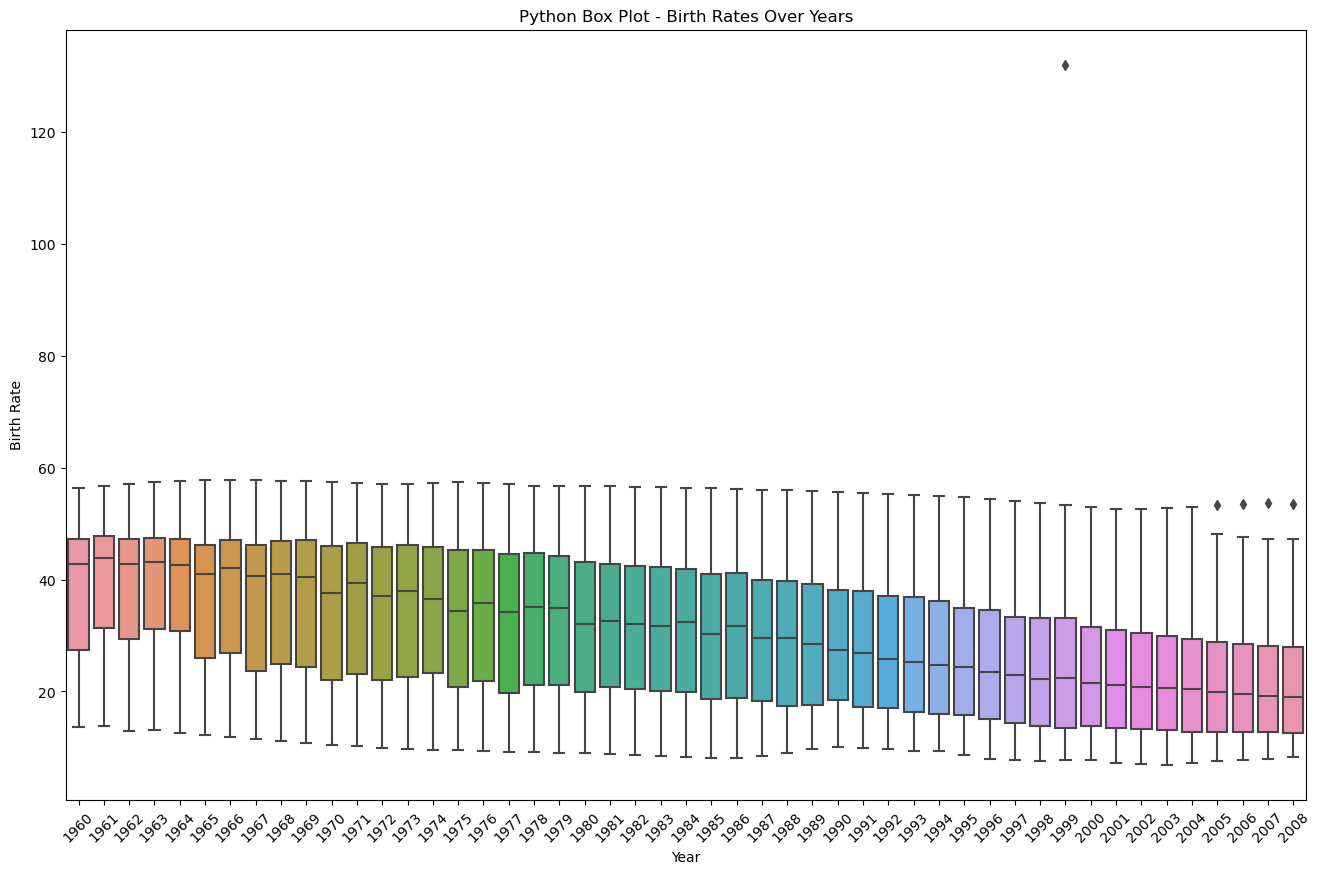

In [117]:
# To crete box-plot

# To melt the birth rate dataframe
birth_rate_data_melted = birthrate_data_df.melt(id_vars=['Country'], var_name='Year', value_name='Birth Rate')

# to convert 'Year' to numeric for proper ordering
birth_rate_data_melted['Year'] = pd.to_numeric(birth_rate_data_melted['Year'])

# To create box plot
fig, ax = plt.subplots(figsize=(16, 10))
sns.boxplot(x='Year', y='Birth Rate', data=birth_rate_data_melted, ax=ax)

# To add titles and labels
ax.set_title('Python Box Plot - Birth Rates Over Years')
ax.set_xlabel('Year')
ax.set_ylabel('Birth Rate')

# To rotate x-axis labels
plt.xticks(rotation=45)

# To save plot as a PNG file
plt.savefig('python-box_plot.png')

# to show the plot
plt.show()

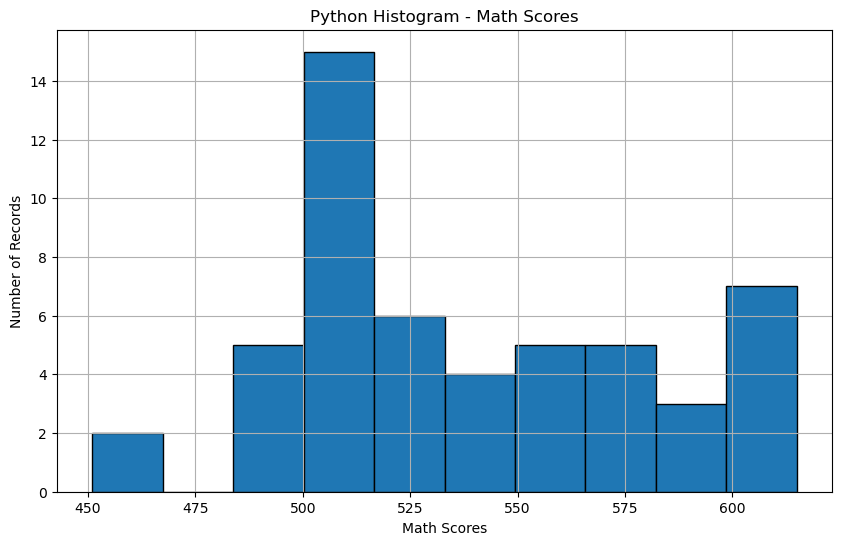

In [118]:
import pandas as pd
import matplotlib.pyplot as plt

# To Load the dataset
df = pd.read_csv('education.csv')
# To get only the Math score
math_scores = df['math']

# To create the histogram
plt.figure(figsize=(10, 6))
plt.hist(math_scores, bins=10, edgecolor='black') 
plt.title('Python Histogram - Math Scores')
plt.xlabel('Math Scores')
plt.ylabel('Number of Records')
plt.grid(True)

# To save plot as a PNG file
plt.savefig('python-histogram.png')

plt.show()


In [121]:
# To merge png visualizations into a pdf

from fpdf import FPDF
import os

# To create instance of FPDF class
pdf = FPDF()

# directory containing the images
image_dir = r'C:\Users\anu18\Desktop\DSC-640\ex6-2\image'

# To list image files to include in the PDF
image_files = [
    'python-histogram.png',
    'python-box_plot.png',
    'python-bulletchart.png',
    'python-circleviewchart.png',
    'r_histogram.png',
    'r_box_plot.png',
    'r_bullet_chart_usa.png',
    'r_circle_views_chart.png',
    'tableau_Histogram.png',
    'tableau_Box-plot.png',
    'tableau_Bulletchart.png',
    'tableau_CircleView.png'
]

# Add each image to the PDF
for image_file in image_files:
    pdf.add_page()
    pdf.image(os.path.join(image_dir, image_file), x = 10, y = 10, w = 190)

# Save the PDF
pdf.output("DSC640_MAHALINGAM-WEEK9&10-VISUALIZATION.pdf")

print("PDF created successfully!")

PDF created successfully!


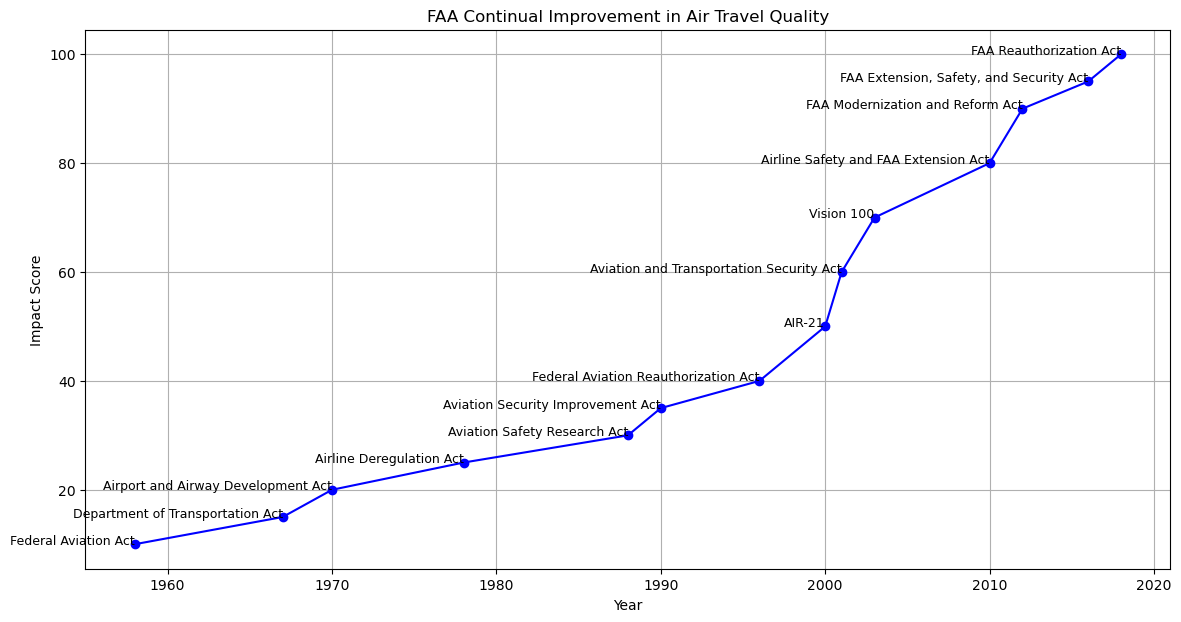

In [124]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data into a DataFrame
data = {
    "Year": [1958, 1967, 1970, 1978, 1988, 1990, 1996, 2000, 2001, 2003, 2010, 2012, 2016, 2018],
    "Regulation": ["Federal Aviation Act", "Department of Transportation Act", "Airport and Airway Development Act", 
                   "Airline Deregulation Act", "Aviation Safety Research Act", "Aviation Security Improvement Act", 
                   "Federal Aviation Reauthorization Act", "AIR-21", "Aviation and Transportation Security Act", 
                   "Vision 100", "Airline Safety and FAA Extension Act", "FAA Modernization and Reform Act", 
                   "FAA Extension, Safety, and Security Act", "FAA Reauthorization Act"],
    "Impact": [10, 15, 20, 25, 30, 35, 40, 50, 60, 70, 80, 90, 95, 100]
}

df = pd.DataFrame(data)

# Plotting the data
plt.figure(figsize=(14, 7))
plt.plot(df['Year'], df['Impact'], marker='o', linestyle='-', color='b')
for i in range(len(df)):
    plt.text(df['Year'][i], df['Impact'][i], df['Regulation'][i], fontsize=9, ha='right')

plt.title('FAA Continual Improvement in Air Travel Quality')
plt.xlabel('Year')
plt.ylabel('Impact Score')
plt.grid(True)

# To save plot as a PNG file
plt.savefig('python-FAA.png')

plt.show()


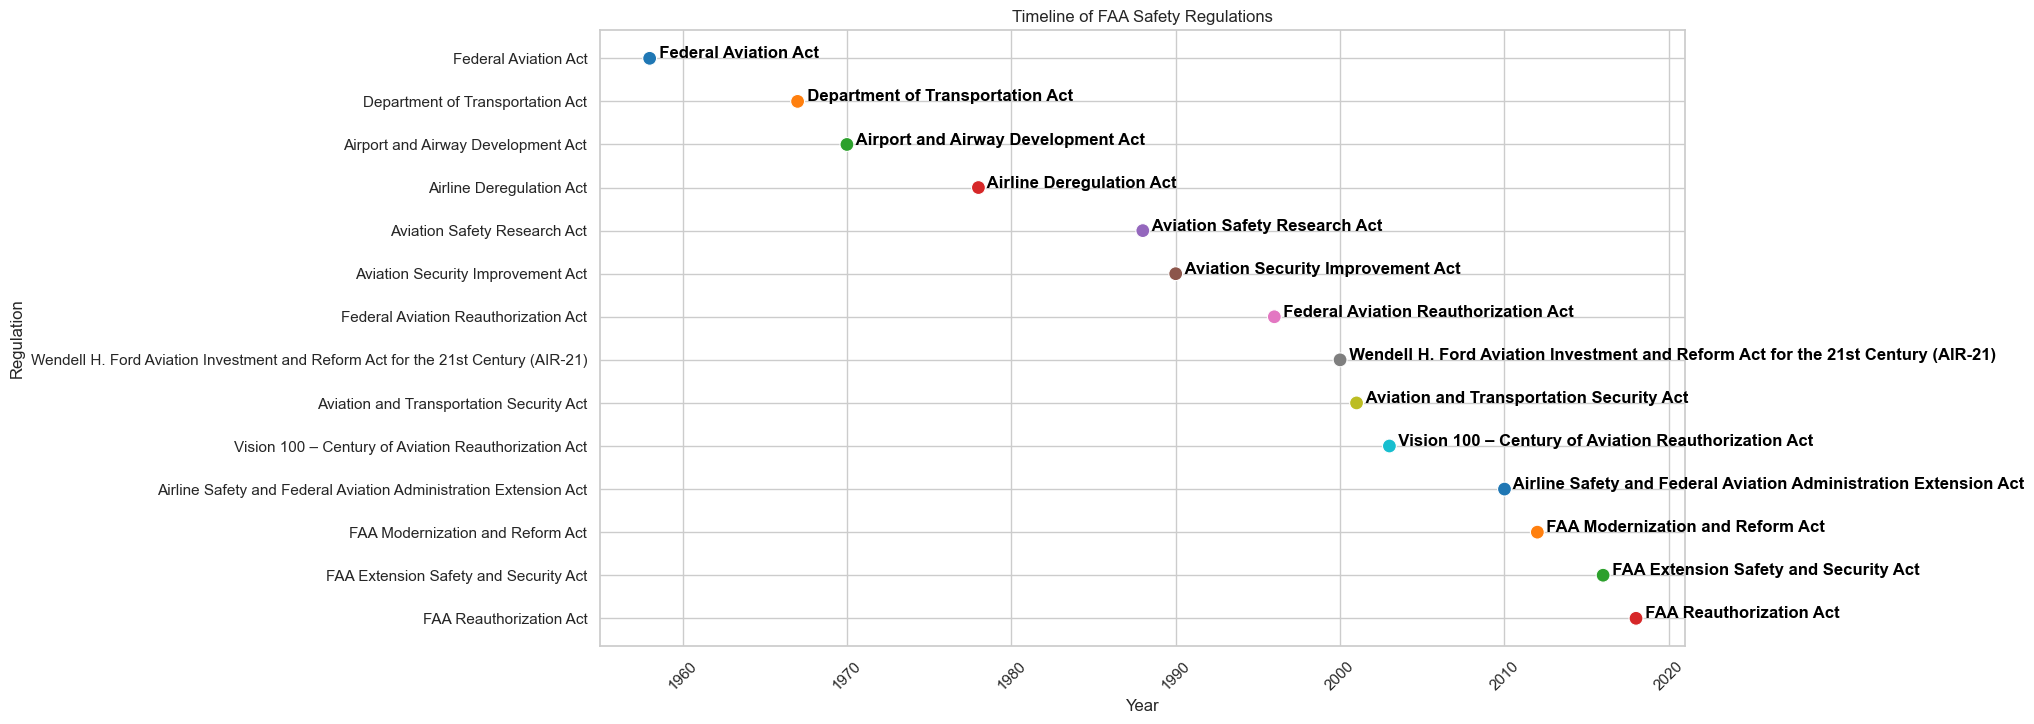

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('FAA-safetydata.csv')

# Convert the Year column to datetime
data['Year'] = pd.to_datetime(data['Year'], format='%Y')

# Set up the plot
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# Create the timeline plot
timeline = sns.scatterplot(x='Year', y='Regulation', hue='Regulation', palette='tab10', data=data, s=100, legend=False)

# Add annotations for each point
for line in range(0, data.shape[0]):
    timeline.text(data.Year[line], data.Regulation[line], '  ' + data.Regulation[line], horizontalalignment='left', size='medium', color='black', weight='semibold')

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Regulation')
plt.title('Timeline of FAA Safety Regulations')
plt.xticks(rotation=45)

# Show the plot
plt.show()


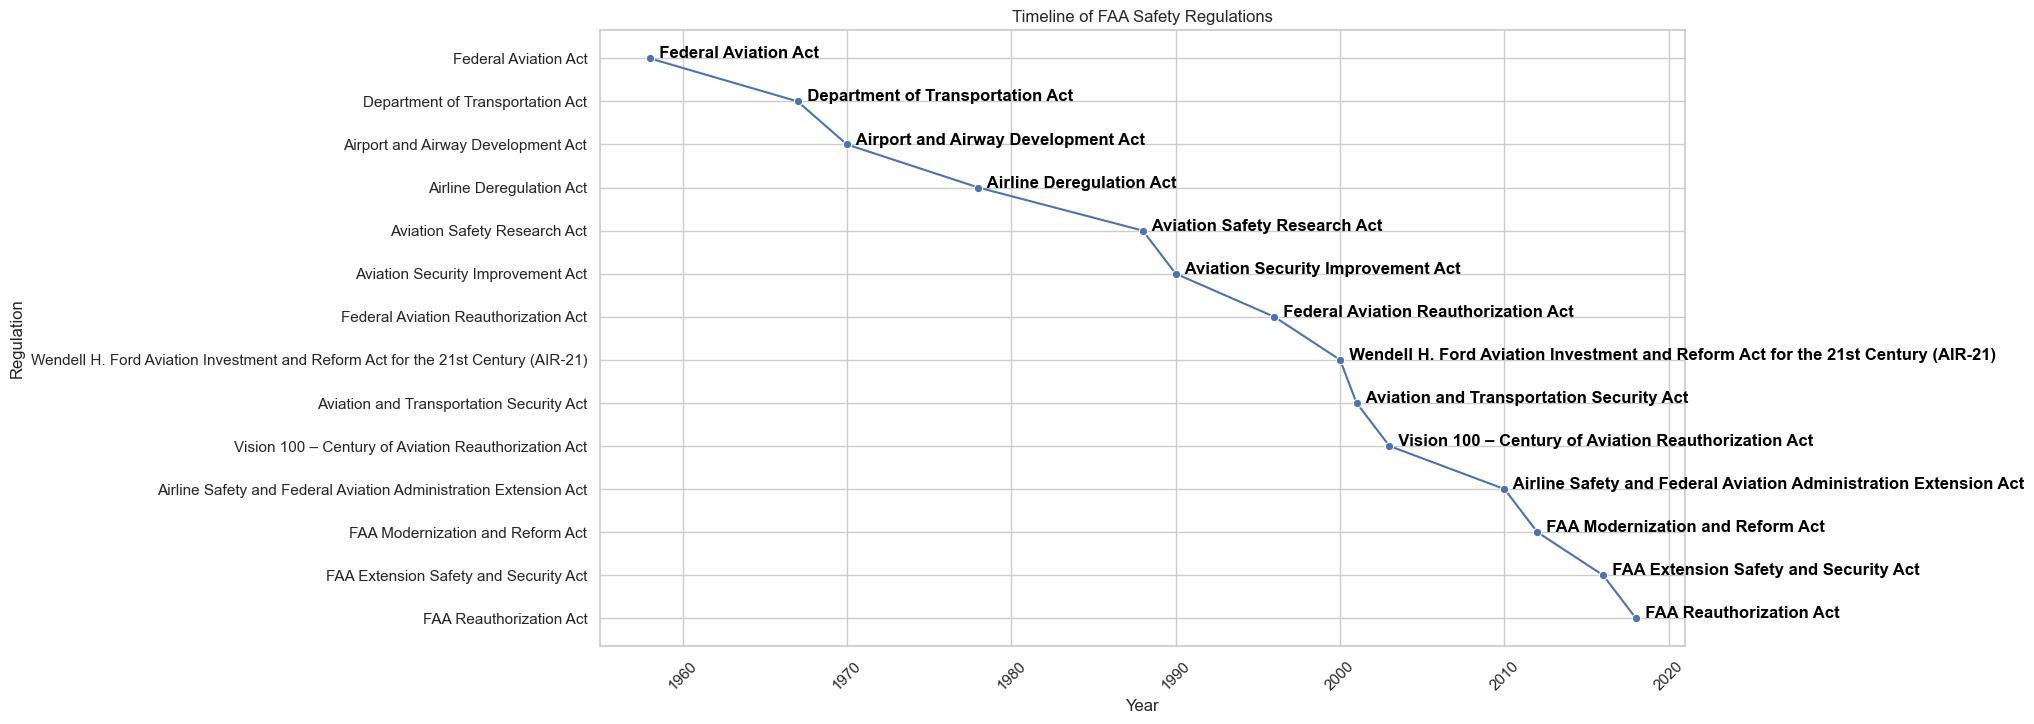

In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('FAA-safetydata.csv')

# Convert the Year column to datetime
data['Year'] = pd.to_datetime(data['Year'], format='%Y')

# Sort the data by Year to ensure the line is plotted correctly
data = data.sort_values('Year')

# Set up the plot
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# Create the timeline plot with a line
timeline = sns.lineplot(x='Year', y='Regulation', data=data, marker='o', sort=False)

# Add annotations for each point
for line in range(0, data.shape[0]):
    timeline.text(data.Year[line], data.Regulation[line], '  ' + data.Regulation[line], horizontalalignment='left', size='medium', color='black', weight='semibold')

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Regulation')
plt.title('Timeline of FAA Safety Regulations')
plt.xticks(rotation=45)

# Show the plot
plt.show()
